- Edison Camilo Huérfano Villalba

2. Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n‘s.

In [ ]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [ ]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [ ]:
def ModifiedBFS_Item1(n): 

        # Default source node
        s=[]
        for i in range(n):
          s.append(i+1)

        # Create dictionaries graph,visited,connections and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        connections = defaultdict(int)
        G = pydot.Dot(graph_type="graph", strict=True)
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        flag = True

        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            if (s == sorted(s)):
              node = pydot.Node(lstr(s),style="filled", fillcolor="green") # first sorted green
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:]  
              if (d != s) and (connections[lstr(d)]<len(s)-1):
                
                node = pydot.Node(lstr(d))
                
                G.add_node(node)
                edge = pydot.Edge(lstr(d),lstr(s))
                G.add_edge(edge)
                graph[lstr(s)].append(lstr(d))
                queue.append(d) 
                visited[lstr(d)] = True 
                connections[lstr(s)] = connections[lstr(s)]+1
                connections[lstr(d)] = connections[lstr(d)]+1
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

        # Find the least number of flips for each node:

        # Reset dictionary visited and create distance,predecessor lists
        visited = defaultdict()
        distance=[]
        predecessor=[]

        # Sorted source node
        s=[]
        for i in range(n):
          s.append(i+1)

        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        countNodes=-1
        biggestDistance=0
        flagFirstNode = True

        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            countNodes = countNodes+1

            # Find distance between node s and sorted node
            if flagFirstNode:
              distance.append(0) # Temporal value
              predecessor.append(0)
              flagFirstNode=False
            else:
              distance[countNodes] = distance[predecessor[countNodes]]+1
              biggestDistance=max(biggestDistance,distance[countNodes])
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:]  
              if (d != s) and not(lstr(d) in visited.keys()):
                  queue.append(d) 
                  distance.append(0) # Temporal value
                  predecessor.append(countNodes)
                  visited[lstr(d)] = True 
                  
        # Print Pn
        print ("For n = "+ str(n) + ", Pn = "+str(biggestDistance))

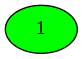

For n = 1, Pn = 0


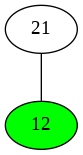

For n = 2, Pn = 1


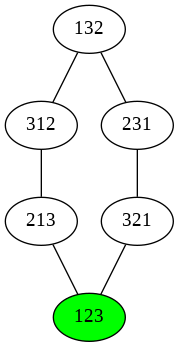

For n = 3, Pn = 3


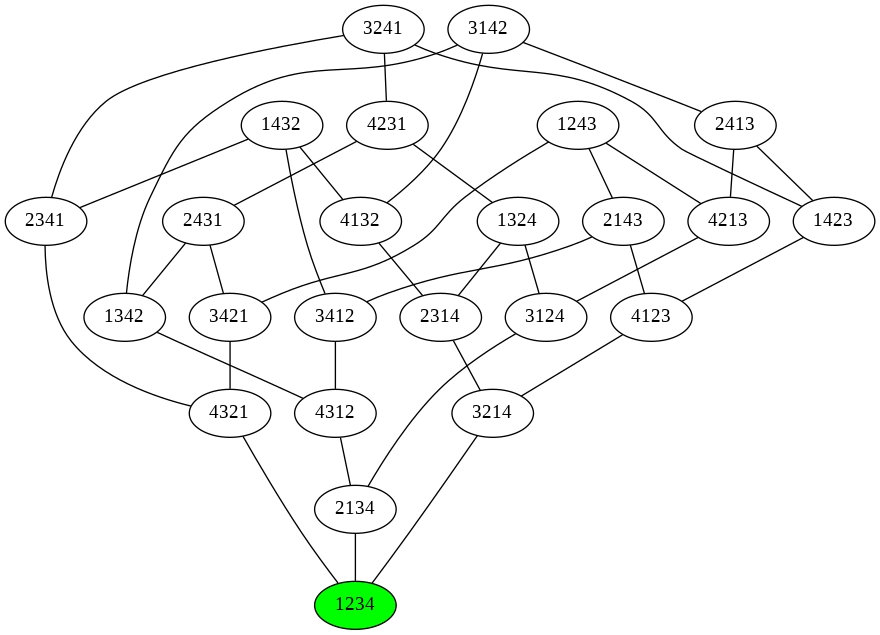

For n = 4, Pn = 4


In [ ]:
# Pancake Network and Pn for n = 1,2,3,4
for n in range(4):
  ModifiedBFS_Item1(n+1)